## import library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cv2_imshow(name: str, src):
    cv2.namedWindow(name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(name, 800, 800)
    cv2.moveWindow(name, 500, 100)

    cv2.imshow(name, src)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Click and get patch for 1st.jpg
### Get coordinate

In [3]:
coord1 = []

def getCoord_1(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        coord1.append((y,x))
        print(x, y)

In [4]:
image1_original = cv2.imread("1st_shifted.jpg")

cv2.namedWindow("1st", cv2.WINDOW_NORMAL)
cv2.resizeWindow("1st", 800, 800)
cv2.moveWindow("1st", 500, 100)
cv2.setMouseCallback("1st", getCoord_1)

cv2.imshow("1st", image1_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

612 973
544 3301
2272 3336
2310 1013


### Make blurred, grayscaled images

In [5]:
image1_blur = cv2.GaussianBlur(image1_original, (0, 0), 1)
image1_gray = cv2.cvtColor(image1_original, cv2.COLOR_BGR2GRAY)
image1_gb = cv2.GaussianBlur(image1_gray, (0,0), 1)

# cv2_imshow("image1_original", image1_original)
# cv2_imshow("image1_blur", image1_blur)
# cv2_imshow("image1_gray", image1_gray)
# cv2_imshow("image1_gb", image1_gb)

### Make patch for each clicked points

In [6]:
patch_size = 4
patch1_original = [image1_original[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch1_blur = [image1_blur[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch1_gray = [image1_gray[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch1_gb = [image1_gb[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]

### Show patches of 1st.jpg

In [7]:
# for i in range(len(patch1_original)):
#     wname = "1st_" + str(i)
#     cv2_imshow(wname, patch1_original[i])

# for i in range(len(patch1_blur)):
#     wname = "1st_" + str(i)
#     cv2_imshow(wname, patch1_blur[i])

# for i in range(len(patch1_gray)):
#     wname = "1st_" + str(i)
#     cv2_imshow(wname, patch1_gray[i])

# for i in range(len(patch1_gb)):
#     wname = "1st_" + str(i)
#     cv2_imshow(wname, patch1_gb[i])

## Click and get patch for 2st.jpg
### Get coordinate

In [8]:
coord2 = []

def getCoord_2(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        coord2.append((y,x))
        print(x, y)

In [9]:
image2_original = cv2.imread("2nd.jpg")

cv2.namedWindow("2nd", cv2.WINDOW_NORMAL)
cv2.resizeWindow("2nd", 800, 800)
cv2.moveWindow("2nd", 500, 100)
cv2.setMouseCallback("2nd", getCoord_2)

cv2.imshow("2nd", image2_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

786 1109
669 3548
2548 3634
2563 1114


### Make blurred, grayscaled images

In [10]:
image2_blur = cv2.GaussianBlur(image2_original, (0, 0), 1)
image2_gray = cv2.cvtColor(image2_original, cv2.COLOR_BGR2GRAY)
image2_gb = cv2.GaussianBlur(image2_gray, (0,0), 1)

# cv2_imshow("image2_original", image2_original)
# cv2_imshow("image2_blur", image2_blur)
# cv2_imshow("image2_gray", image2_gray)
# cv2_imshow("image2_gb", image2_gb)

### Make patch for each clicked points

In [11]:
patch_size = 4
patch2_original = [image2_original[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch2_blur = [image2_blur[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch2_gray = [image2_gray[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]
patch2_gb = [image2_gb[coord1[i][0]-patch_size:coord1[i][0]+patch_size+1, coord1[i][1]-patch_size:coord1[i][1]+patch_size+1] for i in range(len(coord1))]

### Show patches of 2nd.jpg

In [12]:
# for i in range(len(patch2_original)):
#     wname = "2nd_" + str(i)
#     cv2_imshow(wname, patch2_original[i])

# for i in range(len(patch2_blur)):
#     wname = "2nd_" + str(i)
#     cv2_imshow(wname, patch2_blur[i])

# for i in range(len(patch2_gray)):
#     wname = "2nd_" + str(i)
#     cv2_imshow(wname, patch2_gray[i])

# for i in range(len(patch2_gb)):
#     wname = "2nd_" + str(i)
#     cv2_imshow(wname, patch2_gb[i])

## Histograms

In [13]:
hist_bin_gradient = 360/30
hist_bin_color = 256/32

In [14]:
def norm_gradient(src):
    
    x_forward = np.concatenate([src[:, 1:], src[:, -1:]], axis = 1)
    x_backward = np.concatenate([src[:, :1], src[:, :-1]], axis = 1)
    Dx = np.subtract(x_forward, x_backward)/2

    y_forward = np.concatenate([src[1:, :], src[-1:, :]])
    y_backward = np.concatenate([src[:1, :], src[:-1, :]])
    Dy = np.subtract(y_forward, y_backward)/2

    norm_gradient = np.sqrt(np.add(np.square(Dx), np.square(Dy)))
    norm_gradient = np.uint8(np.around(norm_gradient))
    
    return norm_gradient

In [15]:
def gradient_histogram_color(src_list):
    hist_list = []

    for i in range(len(src_list)):
        print(f"- {i+1}th -")
        temp = []

        channels = cv2.split(src_list[i])
        colors = ['b', 'g', 'r']

        for ch, color in zip(channels, colors):
            src = cv2.normalize(ch, None, 0, 360, cv2.NORM_MINMAX)
            src = norm_gradient(src)
            hist = cv2.calcHist([src], [0], None, [int(360/hist_bin_gradient)], [0,360])
            temp.append(hist)
            plt.plot(hist, color=color)
        plt.show()
        hist_list.append(temp)

    return hist_list

In [16]:
def color_histogram_color(src_list):
    hist_list = []

    for i in range(len(src_list)):
        print(f"- {i+1}th -")
        temp = []

        channels = cv2.split(src_list[i])
        colors = ['b', 'g', 'r']

        for ch, color in zip(channels, colors):
            src = cv2.normalize(ch, None, 0, 255, cv2.NORM_MINMAX)
            hist = cv2.calcHist([src], [0], None, [int(256/hist_bin_color)], [0,256])
            temp.append(hist)
            plt.plot(hist, color=color)
        plt.show()
        hist_list.append(temp)

    return hist_list

In [17]:
def gradient_histogram_gray(src_list):
    hist_list = []

    for i in range(len(src_list)):
        print(f"- {i+1}th -")
        src = cv2.normalize(src_list[i], None, 0, 360, cv2.NORM_MINMAX)
        src = norm_gradient(src)
        hist = cv2.calcHist([src], [0], None, [int(360/hist_bin_gradient)], [0, 360])
        hist_list.append(hist)
        plt.plot(hist)
        plt.show()

    return hist_list

In [18]:
def color_histogram_gray(src_list):
    hist_list = []

    for i in range(len(src_list)):
        print(f"- {i+1}th -")
        src = cv2.normalize(src_list[i], None, 0, 255, cv2.NORM_MINMAX)
        hist = cv2.calcHist([src], [0], None, [int(256/hist_bin_gradient)], [0, 256])
        hist_list.append(hist)
        plt.plot(hist)
        plt.show()

    return hist_list

### 1) Color images
#### (1) None_blur
##### a. Gradient Histogram

!!!!!  Color - NoneBlur - Gradient Histogram  !!!!!
*** 1st.jpg ****
- 1th -


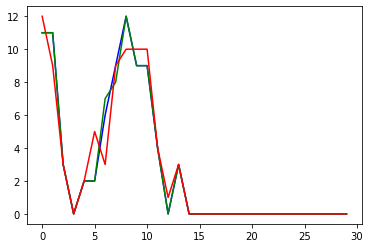

- 2th -


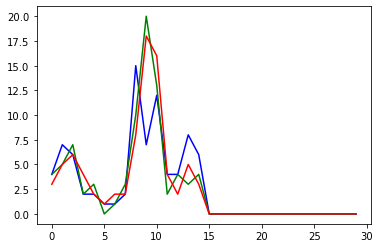

- 3th -


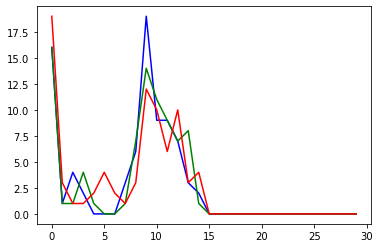

- 4th -


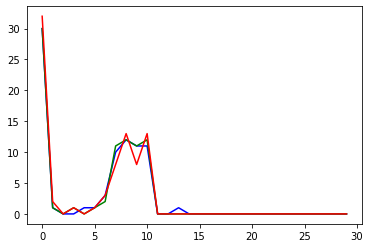

*** 2nd.jpg ****
- 1th -


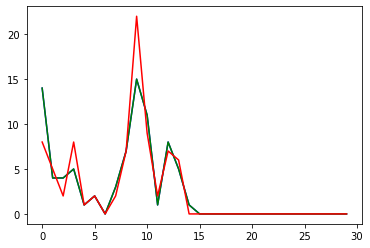

- 2th -


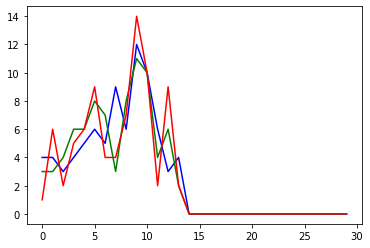

- 3th -


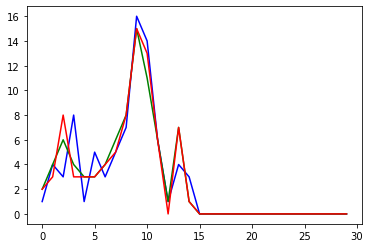

- 4th -


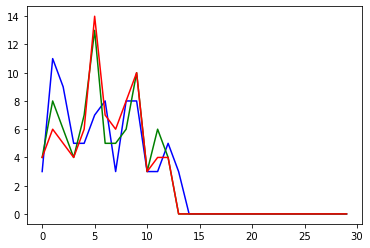

In [19]:
print("!!!!!  Color - NoneBlur - Gradient Histogram  !!!!!")

print("*** 1st.jpg ****")
hl1_CNG = gradient_histogram_color(patch1_original)

print("*** 2nd.jpg ****")
hl2_CNG = gradient_histogram_color(patch2_original)

##### b. Color Histogram

!!!!!  Color - NoneBlur - Color Histogram  !!!!!
*** 1st.jpg ****
- 1th -


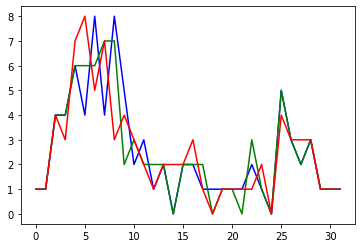

- 2th -


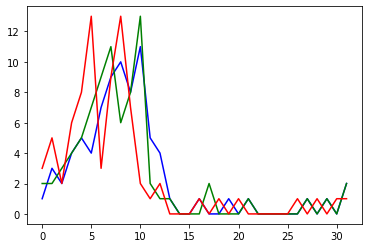

- 3th -


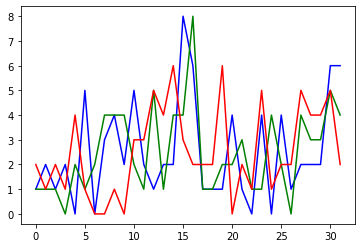

- 4th -


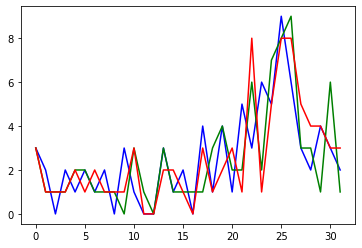

*** 2nd.jpg ****
- 1th -


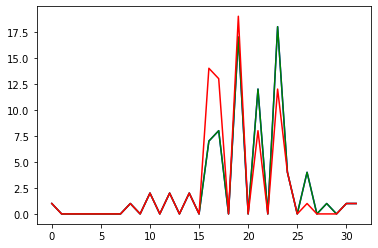

- 2th -


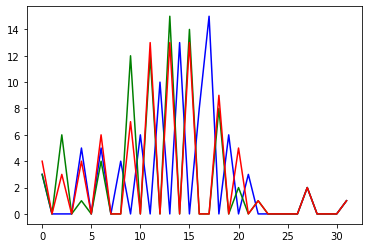

- 3th -


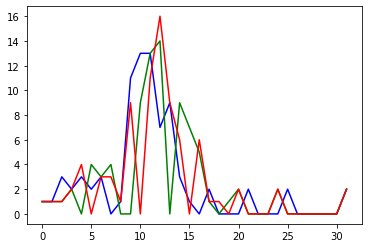

- 4th -


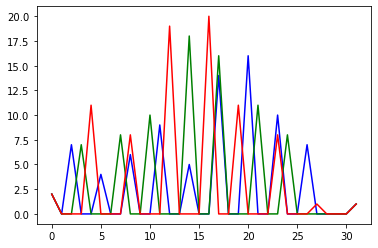

In [20]:
print("!!!!!  Color - NoneBlur - Color Histogram  !!!!!")

print("*** 1st.jpg ****")
hl1_CNC = color_histogram_color(patch1_original)

print("*** 2nd.jpg ****")
hl2_CNC = color_histogram_color(patch2_original)

#### (2) Blur
##### a. Gradient Histogram

!!!!!  Color - Blur - Gradient Histogram  !!!!!
*** 1st.jpg ****
- 1th -


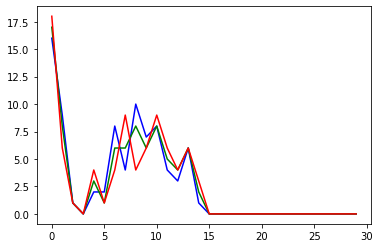

- 2th -


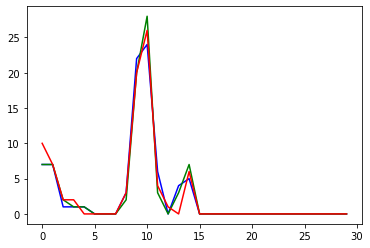

- 3th -


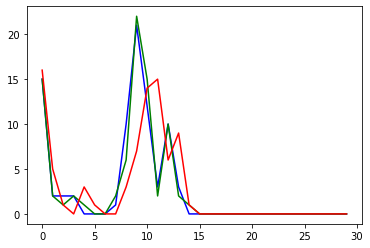

- 4th -


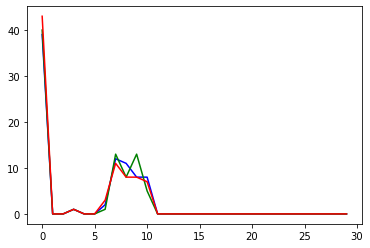

*** 2nd.jpg ****
- 1th -


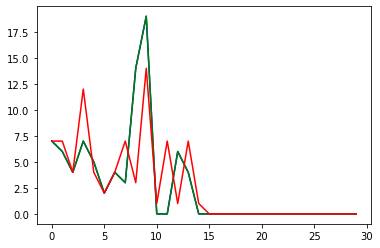

- 2th -


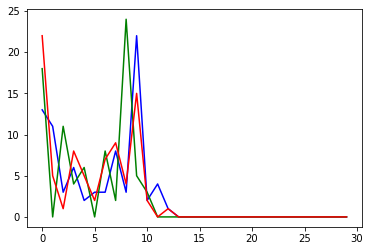

- 3th -


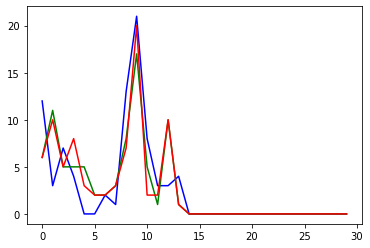

- 4th -


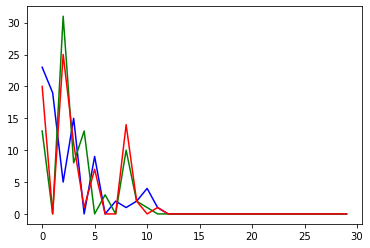

In [21]:
print("!!!!!  Color - Blur - Gradient Histogram  !!!!!")

print("*** 1st.jpg ****")
hl1_CBG = gradient_histogram_color(patch1_blur)

print("*** 2nd.jpg ****")
hl2_CBG = gradient_histogram_color(patch2_blur)

##### b. Color Histogram

!!!!!  Color - Blur - Color Histogram  !!!!!
*** 1st.jpg ****
- 1th -


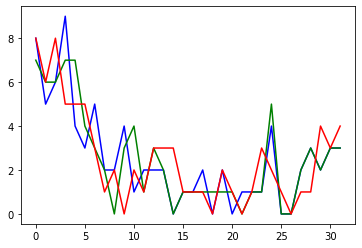

- 2th -


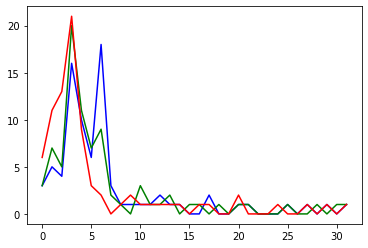

- 3th -


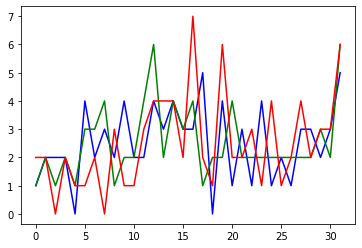

- 4th -


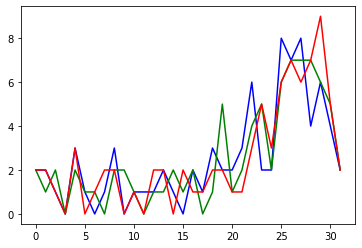

*** 2nd.jpg ****
- 1th -


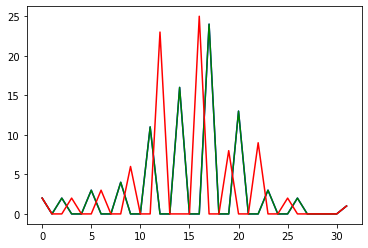

- 2th -


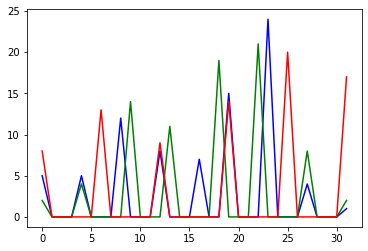

- 3th -


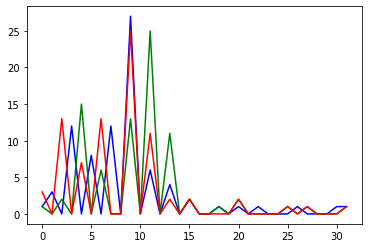

- 4th -


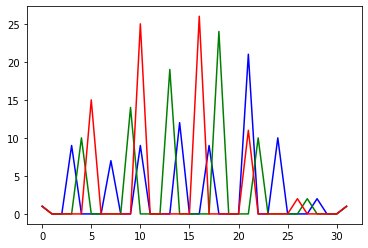

In [22]:
print("!!!!!  Color - Blur - Color Histogram  !!!!!")

print("*** 1st.jpg ****")
hl1_CBC = color_histogram_color(patch1_blur)

print("*** 2nd.jpg ****")
hl2_CBC = color_histogram_color(patch2_blur)

### 2) Gray images
#### (1) None_blur
##### a. Gradient Histogram

!!!!!  Gray - NoneBlur - Gradient Histogram  !!!!!
*** 1st.jpg ****
- 1th -


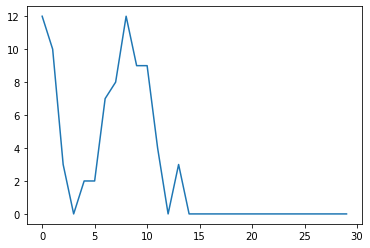

- 2th -


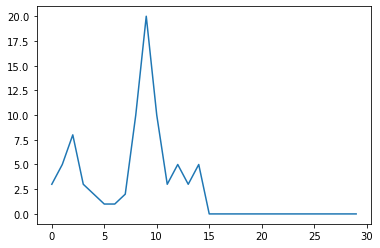

- 3th -


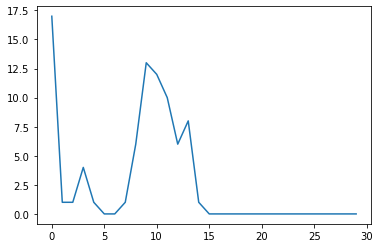

- 4th -


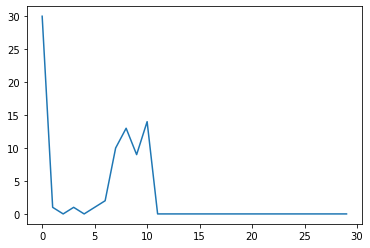

*** 2nd.jpg ****
- 1th -


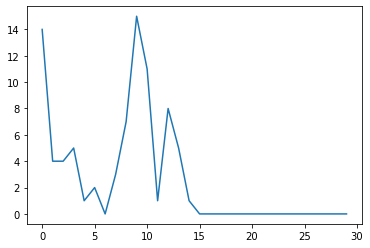

- 2th -


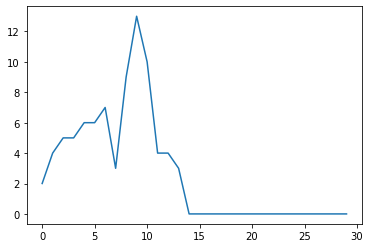

- 3th -


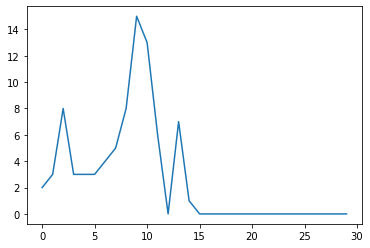

- 4th -


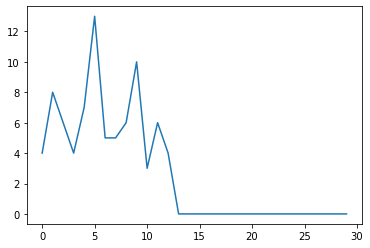

In [23]:
print("!!!!!  Gray - NoneBlur - Gradient Histogram  !!!!!")

print("*** 1st.jpg ****")
hl1_GNG = gradient_histogram_gray(patch1_gray)

print("*** 2nd.jpg ****")
hl2_GNG = gradient_histogram_gray(patch2_gray)

##### b. Color Histogram(brightness)

!!!!!  Gray - NoneBlur - Color Histogram  !!!!!
*** 1st.jpg ****
- 1th -


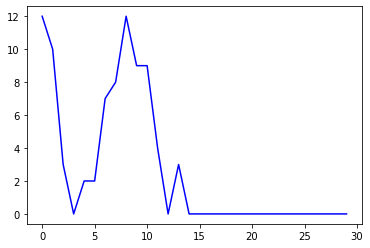

- 2th -


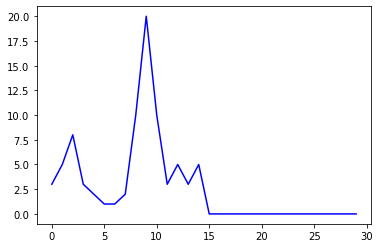

- 3th -


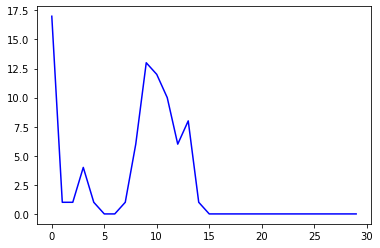

- 4th -


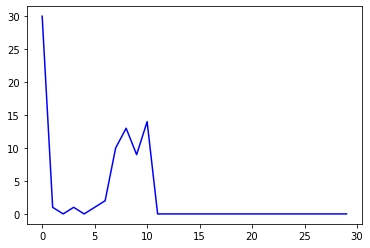

*** 2nd.jpg ****
- 1th -


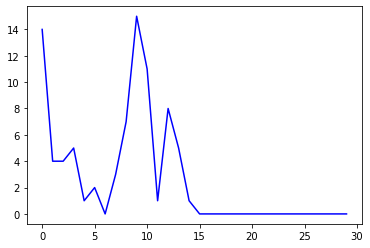

- 2th -


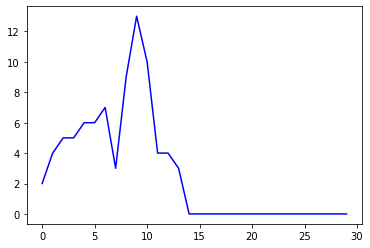

- 3th -


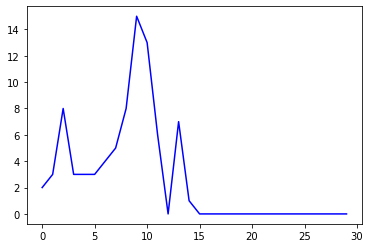

- 4th -


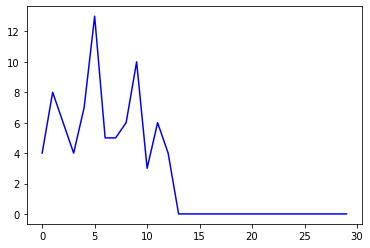

In [24]:
print("!!!!!  Gray - NoneBlur - Color Histogram  !!!!!")

print("*** 1st.jpg ****")
hl1_GNC = gradient_histogram_color(patch1_gray)

print("*** 2nd.jpg ****")
hl2_GNC = gradient_histogram_color(patch2_gray)

#### (2) Blur
##### a. Gradient Histogram

!!!!!  Gray - Blur - Gradient Histogram  !!!!!
*** 1st.jpg ****
- 1th -


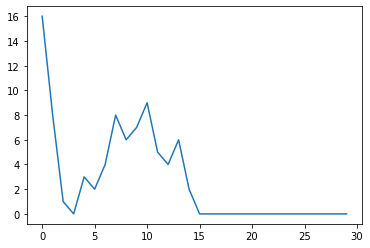

- 2th -


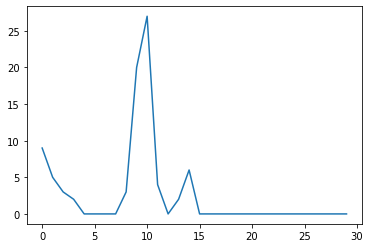

- 3th -


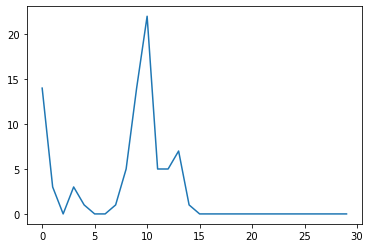

- 4th -


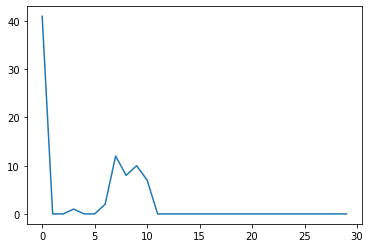

*** 2nd.jpg ****
- 1th -


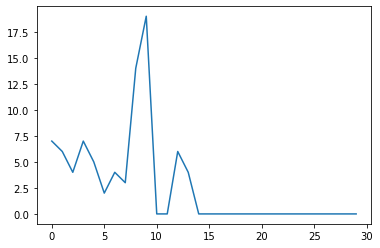

- 2th -


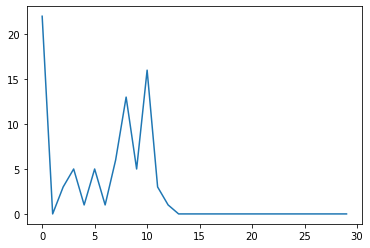

- 3th -


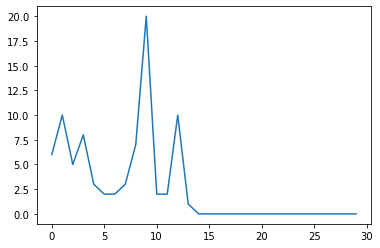

- 4th -


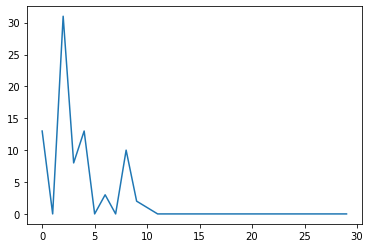

In [25]:
print("!!!!!  Gray - Blur - Gradient Histogram  !!!!!")

print("*** 1st.jpg ****")
hl1_GBG = gradient_histogram_gray(patch1_gb)

print("*** 2nd.jpg ****")
hl2_GBG = gradient_histogram_gray(patch2_gb)

##### b. Color Histogram

!!!!!  Gray - Blur - Color Histogram  !!!!!
*** 1st.jpg ****
- 1th -


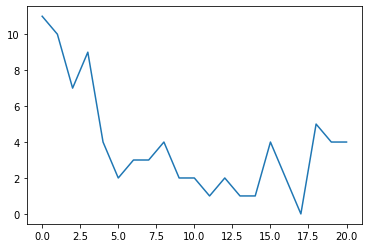

- 2th -


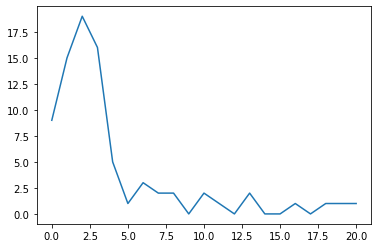

- 3th -


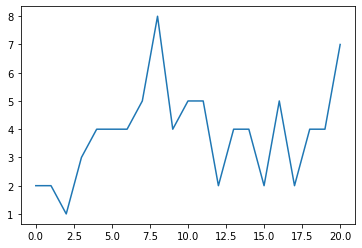

- 4th -


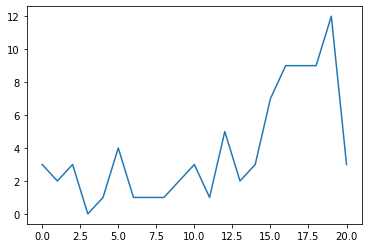

*** 2nd.jpg ****
- 1th -


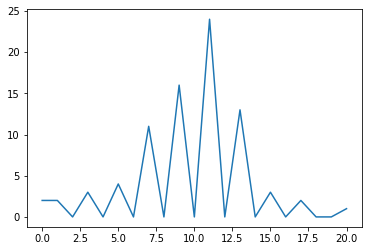

- 2th -


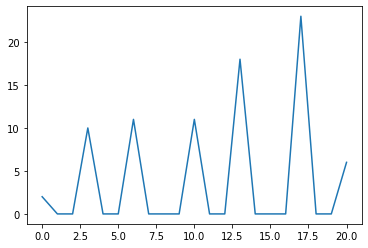

- 3th -


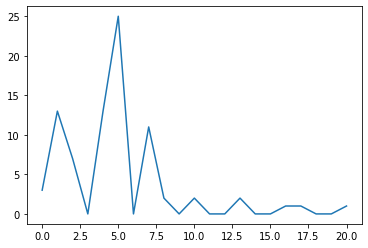

- 4th -


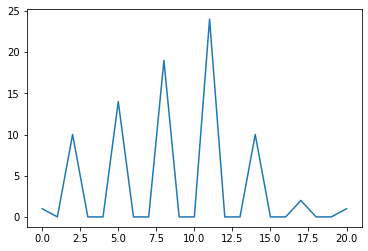

In [26]:
print("!!!!!  Gray - Blur - Color Histogram  !!!!!")

print("*** 1st.jpg ****")
hl1_GBC = color_histogram_gray(patch1_gb)

print("*** 2nd.jpg ****")
hl2_GBC = color_histogram_gray(patch2_gb)

## Matching
### Calculate similarity

In [27]:
def matching_color(hist1, hist2):
    mse = []
    for h1 in range(4):
        h1_mse = []
        for h2 in range(4):
            h1_mse.append(np.sum(np.square(np.subtract(hist1[h1], hist2[h2])).mean()))
        mse.append(h1_mse)

    res = []
    for h1 in range(4):
        min = 99999999999
        index = None
        for h2 in range(4):
            if mse[h1][h2] < min:
                min = mse[h1][h2]
                index = h2
        res.append(index)
            
    return (mse, res)


In [28]:
def matching_gray(hist1, hist2):
    mse = []
    for h1 in range(4):
        h1_mse = []
        for h2 in range(4):
            h1_mse.append(np.square(np.subtract(hist1[h1], hist2[h2])).mean())
        mse.append(h1_mse)

    res = []
    for h1 in range(4):
        min = 99999999999
        index = None
        for h2 in range(4):
            if mse[h1][h2] < min:
                min = mse[h1][h2]
                index = h2
        res.append(index)
            
    return (mse, res)


### Draw box and line

In [29]:
rec_size = 50

def draw_rectangle(src, coord):
    colors = [(0,0,255), (255,0,0), (0,255,0), (255,255,255)]
    t = src.copy()
    for i in range(len(coord)):
        t = cv2.rectangle(t, [coord[i][1]-rec_size, coord[i][0]-rec_size], [coord[i][1]+rec_size, coord[i][0]+rec_size], colors[i], 10)
    return t

rectangled = np.concatenate((draw_rectangle(image1_original, coord1), draw_rectangle(image2_original, coord2)), axis=1)

In [30]:
line_size = 10

def draw_line(src, coord1, coord2, match):
    t = src.copy()
    for i in range(len(match)):
        t = cv2.line(t, (coord1[i][1], coord1[i][0]), (coord2[match[i]][1] + image1_original.shape[1], coord2[match[i]][0]), color=(0,0,0), thickness=line_size)
    return t

Color image: NoneBlur, Gradient histogram

In [31]:
match = matching_color(hl1_CNG, hl2_CNG)
lined = draw_line(rectangled, coord1, coord2, match[1])
cv2.imwrite("res_shift/Color_NoneBlur_Gradient.jpg", lined)

True

Color image: NonBlur, Color histogram

In [32]:
match = matching_color(hl1_CNC, hl2_CNC)
lined = draw_line(rectangled, coord1, coord2, match[1])
cv2.imwrite("res_shift/Color_NoneBlur_Color.jpg", lined)

True

Color image: Blur, Gradient histogram

In [33]:
match = matching_color(hl1_CBG, hl2_CBG)
lined = draw_line(rectangled, coord1, coord2, match[1])
cv2.imwrite("res_shift/Color_Blur_Gradient.jpg", lined)

True

Color image: Blur, Color histogram

In [34]:
match = matching_color(hl1_CBC, hl2_CBC)
lined = draw_line(rectangled, coord1, coord2, match[1])
cv2.imwrite("res_shift/Color_Blur_Color.jpg", lined)

True

Gray image: NoneBlur, Gradient histogram

In [35]:
match = matching_gray(hl1_GNG, hl2_GNG)
lined = draw_line(rectangled, coord1, coord2, match[1])
cv2.imwrite("res_shift/Gray_NoneBlur_Gradient.jpg", lined)

True

Gray image: NoneBlur, Color histogram

In [36]:
match = matching_gray(hl1_GNC, hl2_GNC)
lined = draw_line(rectangled, coord1, coord2, match[1])
cv2.imwrite("res_shift/Gray_NoneBlur_Color.jpg", lined)

True

Gray image: Blur, Gradient histogram

In [37]:
match = matching_gray(hl1_GBG, hl2_GBG)
lined = draw_line(rectangled, coord1, coord2, match[1])
cv2.imwrite("res_shift/Gray_Blur_Gradient.jpg", lined)

True

Gray image: Blur, Color histogram

In [38]:
match = matching_gray(hl1_GBC, hl2_GBC)
lined = draw_line(rectangled, coord1, coord2, match[1])
cv2.imwrite("res_shift/Gray_Blur_Color.jpg", lined)

True